# HW4 - Bardi Momeni

# Q1

## Written anwser

SD describes how each data point has deviated from the mean of the sample, SEM gives an indication of just how much the mean would vary had there been several samples. While SD deals with the variability in the data themselves, SEM addresses the reliability of the mean.

or in short:
- SD is about how spread out the data are.

- SEM is about how confident you can be that your sample mean represents the population mean.

# Q2

## Written anwser

The idea is we use bootstraping to get a distribuation of mny many sample means, the mean of that should be aproximetly to our true mean, the SD of these should be our SEM, we multiply SEM by 1.96 to get the margin of error, Finally, we plug this into the confidence interval formula and get our cofidence interval that covers 95% of the bootstrapped means.

# Q3

## Written anwser

We basicly do it by hand , we sort them and we take the 2.5th and the 97.5 percentile (the middle 95 percent falls in between) and, Wallah! we have our interval.

---

# Chat Summary for Q1-3

Link : https://chatgpt.com/share/66fb1646-e50c-8011-9d04-336db3505f89

gpt writen summary :

1. **Introduction to SEM**: 
   - SEM measures the precision of the sample mean as an estimate of the population mean.
   - We use SEM to calculate the margin of error for confidence intervals.

2. **Bootstrapping Process**: 
   - Generate multiple resamples from the original dataset.
   - Calculate the sample mean for each resample to create a distribution of bootstrapped means.

3. **Percentile Method**:
   - Sort the bootstrapped means.
   - Take the 2.5th and 97.5th percentiles to create a 95% confidence interval.
   - This avoids relying on the SEM and directly uses the empirical distribution.

4. **Using SEM for CI**: 
   - Alternatively, SEM can be estimated from the bootstrapped means’ standard deviation.
   - Apply the formula: \( \text{CI} = \bar{x} \pm 1.96 \times \text{SEM} \) for a 95% confidence interval.
  
---


# Q4

## code

95% Bootstrap Confidence Interval for the Mean: [47.28, 50.63]


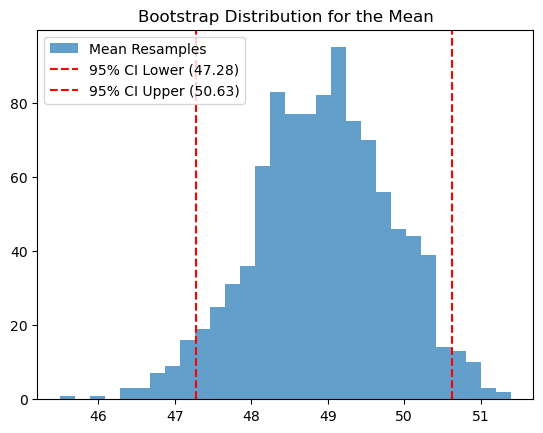

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a random sample from a normal distribution
np.random.seed(42)  # For reproducibility
sample = np.random.normal(loc=50, scale=10, size=100)  # Mean=50, SD=10, Sample Size=100

# Step 2: Define the function to perform bootstrap resampling
def bootstrap_resample(data, num_resamples=1000):
    """Generate bootstrap resamples from the given data."""
    n = len(data)
    resamples = np.random.choice(data, size=(num_resamples, n), replace=True)
    return resamples

# Step 3: Define a function to compute the bootstrap confidence interval
def bootstrap_ci(data, stat_func=np.mean, num_resamples=1000, ci=95):
    """
    Compute the bootstrap confidence interval for the given statistic.
    
    Parameters:
        data: The original sample data.
        stat_func: The statistic function (e.g., np.mean, np.median).
        num_resamples: The number of bootstrap resamples to generate.
        ci: The confidence interval percentage (default is 95%).
        
    Returns:
        Lower and upper bounds of the confidence interval.
    """
    resamples = bootstrap_resample(data, num_resamples)
    # Apply the statistic function to each resample
    stat_resamples = np.apply_along_axis(stat_func, 1, resamples)
    # Compute the percentiles for the confidence interval
    lower_bound = np.percentile(stat_resamples, (100 - ci) / 2)
    upper_bound = np.percentile(stat_resamples, 100 - (100 - ci) / 2)
    return lower_bound, upper_bound

# Step 4: Compute the 95% bootstrap confidence interval for the population mean
mean_ci_lower, mean_ci_upper = bootstrap_ci(sample, stat_func=np.mean, num_resamples=1000, ci=95)

print(f"95% Bootstrap Confidence Interval for the Mean: [{mean_ci_lower:.2f}, {mean_ci_upper:.2f}]")

# Step 5: Plot the distribution of bootstrap resamples for the mean (optional)
plt.hist(np.apply_along_axis(np.mean, 1, bootstrap_resample(sample)), bins=30, alpha=0.7, label='Mean Resamples')
plt.axvline(mean_ci_lower, color='red', linestyle='--', label=f'95% CI Lower ({mean_ci_lower:.2f})')
plt.axvline(mean_ci_upper, color='red', linestyle='--', label=f'95% CI Upper ({mean_ci_upper:.2f})')
plt.title('Bootstrap Distribution for the Mean')
plt.legend()
plt.show()


In [2]:
# Step 6: Modify the code to compute the 95% CI for the median
median_ci_lower, median_ci_upper = bootstrap_ci(sample, stat_func=np.median, num_resamples=1000, ci=95)

print(f"95% Bootstrap Confidence Interval for the Median: [{median_ci_lower:.2f}, {median_ci_upper:.2f}]")

# Step 7: Compute the 95% bootstrap confidence interval for the population standard deviation
std_ci_lower, std_ci_upper = bootstrap_ci(sample, stat_func=np.std, num_resamples=1000, ci=95)
print(f"95% Bootstrap Confidence Interval for the Standard Deviation: [{std_ci_lower:.2f}, {std_ci_upper:.2f}]")

95% Bootstrap Confidence Interval for the Median: [47.00, 51.41]
95% Bootstrap Confidence Interval for the Standard Deviation: [7.80, 10.15]


## Written anwser

the code above that chat produced in my understanding does this:

- First generates a normal distiribution sample. 
- Then we use this sample as our population and then we start resample over and over and saving mean median and others for each resample. 
- At last we compute the 95% CI for our statistics by calling `bootstrap_ci` and using `np.mean`, `np.median` and `np.std` and either printing them out or visualazing them or if we feeling fancy both!

---

# Chat Summary for Q4

Link : https://chatgpt.com/share/66fb3a63-dec4-8011-93ee-6a1727b8ef54

## Bootstrap Confidence Interval for Mean, Median, and Standard Deviation

### Steps We Did:

1. **Generated a Sample**:
   - Created a random sample from a normal distribution using `np.random.normal()`.
   
2. **Bootstrap Resampling**:
   - Implemented a function (`bootstrap_resample`) to perform bootstrap resampling from this sample.

3. **Confidence Interval Calculation**:
   - Created a function (`bootstrap_ci`) to compute 95% bootstrap confidence intervals for different population parameters:
     - **Mean**: Used `np.mean` as the statistic function.
     - **Median**: Used `np.median` as the statistic function.
     - **Standard Deviation**: Used `np.std` as the statistic function.
   - Calculated the confidence intervals by resampling, computing statistics, and finding percentiles.

4. **Output & Visualization**:
   - Printed the confidence intervals for the mean, median, and standard deviation.
   - Optionally visualized the bootstrap distributions using histograms to show how the statistics varied across resamples.

---

# Q5

## Written anwser

Our estimate is a target towards the parameter of the population, while the statistic of the sample is our guide to making this estimate. Confidence intervals give a measure of uncertainty of our estimate due to the variability of the sample. Knowing the difference ensures the confidence intervals are interpreted correctly, keeping in mind what the population values are without mixing it up with the sample data observed.

# Q6

## Written anwser

1. So, bootstrapping is basically this: instead of just running the stats once on your sample and hoping it’s accurate, you resample a bunch of times. It’s like taking your data, making a new sample of the same size (and by the way, it’s cool if some data points repeat — that’s part of the deal), and doing this over and over again. You run the calculations each time, and then you make a histogram of whatever stat you’re interested in (like the average, median, etc.). This way, instead of relying on just one calculation that might be way off, you’re creating a bunch of outcomes and getting a better idea of what’s really going on with your data. It helps give you a feel for how much your results might vary if you were to take more samples from the population.

2. The main purpose of bootstrapping is to avoid making decisions based on one shaky calculation. Like, you don’t want to just calculate your stat once and cross your fingers that it's close enough, right? By resampling a bunch of times, you’re reducing the risk of being way off. It’s all about getting a sense of how much the numbers can actually vary — gives you more confidence in your estimates. Instead of guessing, you’re looking at a bunch of results and saying, “Okay, this is a pretty solid range for what’s going on here.”

3. So, let’s say you’ve got a guess about what the average for the whole population is, and you’ve got your sample of size n. You want to see if your guess holds up. What you can do is use bootstrapping — you take your sample, resample it a bunch of times (same size each time, and yeah, some points might repeat), and then calculate the average for each of those resamples.Now, you’ll have a whole bunch of averages, right? You make a histogram out of those, and then check where your guess falls. If your hypothesized average fits within that range of resampled averages, you’re probably on track. But if your guess is way off compared to all those bootstrap averages, then your guess might not be so plausible after all. It’s like a reality check without needing to go back and get more data.

# Q7

## Written anwser

So, when you’ve got a confidence interval that includes zero, what it’s basically saying is, "Hey, zero is a possible value for the true effect or difference." In other words, your data isn’t giving strong enough evidence to say that there’s definitely something going on — it could still be that nothing’s happening (aka, the null hypothesis is true). Even if your sample mean isn’t zero, that confidence interval is telling you, "Well, we’re not sure if that difference is real or just random noise," so you don’t have enough juice to reject the null hypothesis.

On the flip side, if your confidence interval doesn’t overlap zero, that’s when things get interesting. Now, zero is not in the range of possible values, so you can feel more confident that there’s an actual effect or difference happening — meaning the null hypothesis (which usually says there's no effect) is likely wrong, and you can reject it.

---

# Chat Summary for Q5-7

No gpt used in this questions, just google/ wiki textbook

---

# Q8

## Code

In [3]:
import pandas as pd

# Define the data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save DataFrame to CSV
df.to_csv('alitech_vaccine_data.csv', index=False)


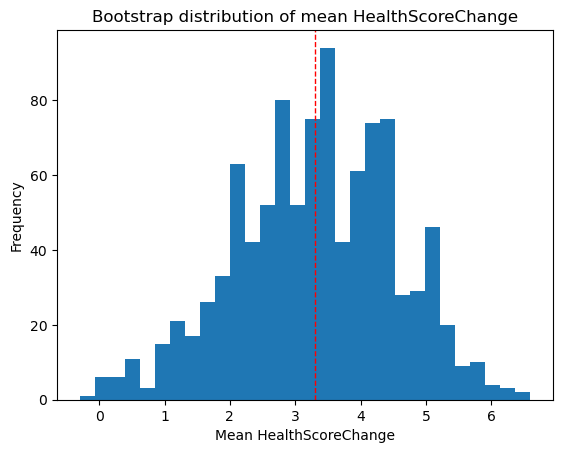

95% confidence interval: [0.7 5.5]
Mean change in health scores: 3.3


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('alitech_vaccine_data.csv')

# Calculate the change in health scores
data['HealthScoreChange'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Bootstrap function
def bootstrap(data, n_bootstrap=1000):
    np.random.seed(42)
    means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data['HealthScoreChange'], size=len(data), replace=True)
        means.append(np.mean(sample))
    return means

# Perform bootstrapping
boot_means = bootstrap(data)

# Visualize the bootstrap results
plt.hist(boot_means, bins=30)
plt.axvline(np.mean(data['HealthScoreChange']), color='red', linestyle='dashed', linewidth=1)
plt.title('Bootstrap distribution of mean HealthScoreChange')
plt.xlabel('Mean HealthScoreChange')
plt.ylabel('Frequency')
plt.show()

# Calculate the 95% confidence interval
conf_interval = np.percentile(boot_means, [2.5, 97.5])
print(f"95% confidence interval: {conf_interval}")

# Mean of the original data
mean_change = np.mean(data['HealthScoreChange'])
print(f"Mean change in health scores: {mean_change}")


# Q9 : yes

---

# Chat Summary for Q8

Link : https://chatgpt.com/share/66fb43c6-4a38-8011-a934-caec4a403e1c

# Session Summary

1. **Assignment Overview**: Analyze AliTech's vaccine effectiveness using health score data.
2. **Null Hypothesis (H₀)**: The vaccine has no effect on health scores (changes are random).
3. **Data Visualization**: Bar plots and histograms to compare initial vs final health scores.
4. **Quantitative Analysis**: Bootstrapping used to estimate mean health score changes and calculate a 95% confidence interval.
5. **CSV in Jupyter**: Explained how to create and load CSV, though you already had it.
6. **Conclusion**: Reject or fail to reject H₀ based on the confidence interval.


---